<a href="https://colab.research.google.com/github/jeffreyphilipbiju/Sales-Forecasting-for-Retail-Chain/blob/main/month2week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -------------------------------------------------------------
# 📌 Step 1: Import required libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [ ]:
# -------------------------------------------------------------
# 📥 Step 2: Load data
# -------------------------------------------------------------
df = pd.read_csv('sales.csv', encoding='latin1')

print("📌 First few rows:")
print(df.head())

print("\n🔍 Dataset shape:", df.shape)


📌 First few rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0    9426  CA-2014-116246   9/12/2014   9/17/2014    Second Class    LW-17215   
1    3960  CA-2016-156573   5/29/2016    6/2/2016  Standard Class    RB-19360   
2    1878  CA-2017-118885  12/29/2017    1/2/2018  Standard Class    JG-15160   
3    8134  CA-2015-131352   10/8/2015  10/13/2015  Standard Class    GH-14485   
4     141  CA-2016-110366    9/5/2016    9/7/2016    Second Class    JD-15895   

      Customer Name    Segment        Country           City  ... Postal Code  \
0        Luke Weiss   Consumer  United States  New York City  ...       10035   
1      Raymond Buch   Consumer  United States      Nashville  ...       37211   
2      James Galang   Consumer  United States    Los Angeles  ...       90049   
3         Gene Hale  Corporate  United States         Dallas  ...       75081   
4  Jonathan Doherty  Corporate  United States   Philadelphia  ...       19140   

    Regi

In [ ]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# -------------------------------------------------------------
# 🧹 Step 3: Data Cleaning
# -------------------------------------------------------------
# Check missing values
print("\n❓ Missing values per column:")
print(df.isnull().sum())

# Fill missing values:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values after filling:")
print(df.isnull().sum())

# Remove duplicates
num_duplicates = df.duplicated().sum()
print(f"\n📦 Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed. New shape:", df.shape)
else:
    print("✅ No duplicate rows found.")



❓ Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

✅ Missing values after filling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

📦 Number of duplicate rows: 0
✅ No duplicate rows found.


/tmp/ipython-input-5-1281302645.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-5-1281302645.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# -------------------------------------------------------------
# 🕵️‍♂️ Step 4: Exploratory Data Analysis (EDA)
# -------------------------------------------------------------

print("\n📊 Data types:")
print(df.dtypes)

print("\n📈 Statistical summary:")
print(df.describe(include='all'))



📊 Data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

📈 Statistical summary:
             Row ID        Order ID Order Date  Ship Date       Ship Mode  \
count   6363.000000            6363       6363       6363            6363   
unique          NaN            1764        889        960               4   
top             NaN  CA-2017-125451   9/5/2016  12/6/2017  Standard Class   
freq            NaN              12         30         30            3744   
mean    5041.643564             NaN  

##sales by Region

/tmp/ipython-input-7-4145003587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


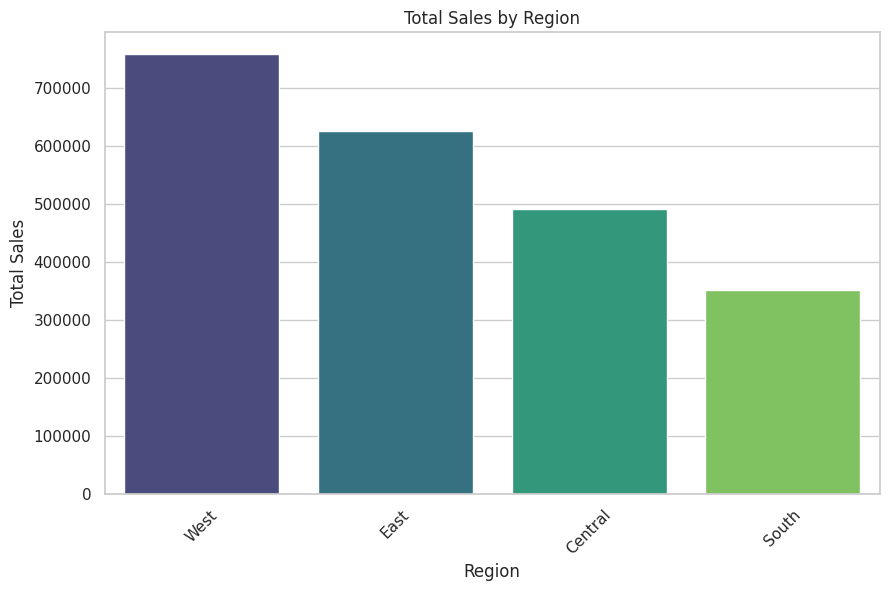

In [ ]:
if 'Region' in df.columns and 'Sales' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
    plt.title('Total Sales by Region')
    plt.ylabel('Total Sales')
    plt.xlabel('Region')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Columns 'Region' or 'Sales' not found.")


## sales by Product Category



/tmp/ipython-input-8-2289880490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')


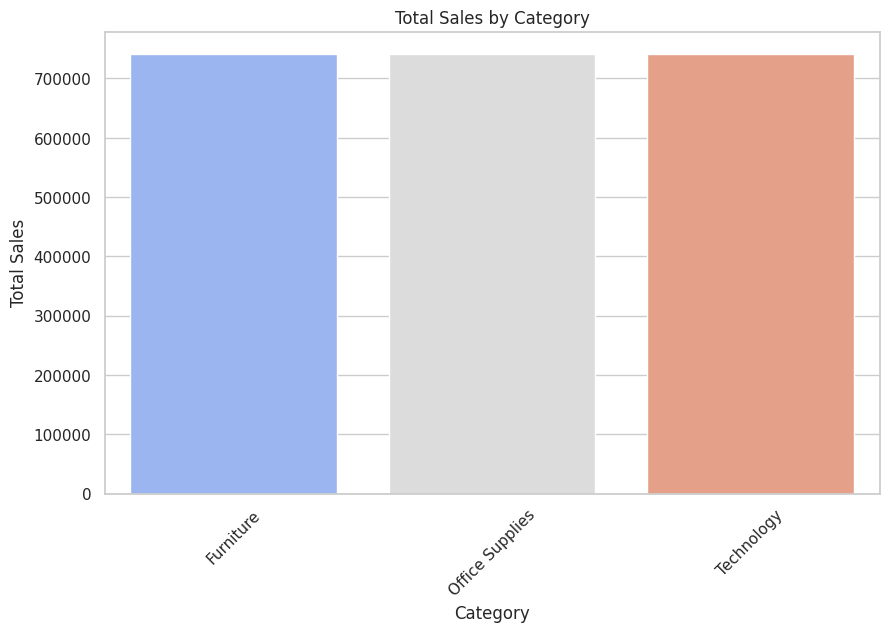

In [ ]:
if 'Category' in df.columns and 'Sales' in df.columns:
    category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
    plt.title('Total Sales by Category')
    plt.ylabel('Total Sales')
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Columns 'Category' or 'Sales' not found.")


##sales by Sub-Category

/tmp/ipython-input-9-3101556949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette='magma')


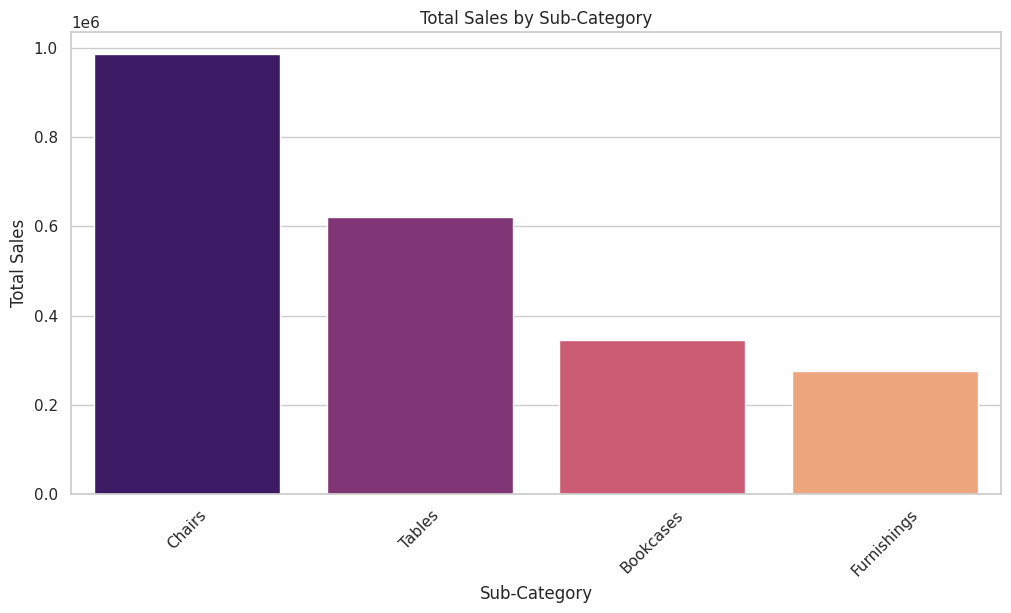

In [ ]:
if 'Sub-Category' in df.columns and 'Sales' in df.columns:
    subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette='magma')
    plt.title('Total Sales by Sub-Category')
    plt.ylabel('Total Sales')
    plt.xlabel('Sub-Category')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Columns 'Sub-Category' or 'Sales' not found.")


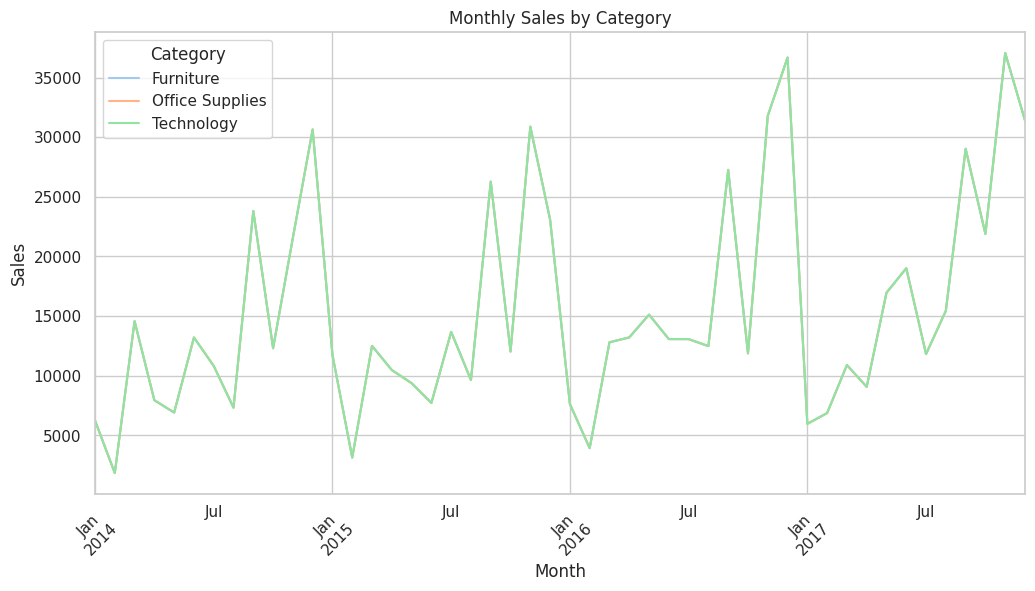

In [ ]:
# Sales trend per Category
df.groupby(['Month', 'Category'])['Sales'].sum().unstack().plot()
plt.title("Monthly Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


##sales trend over time

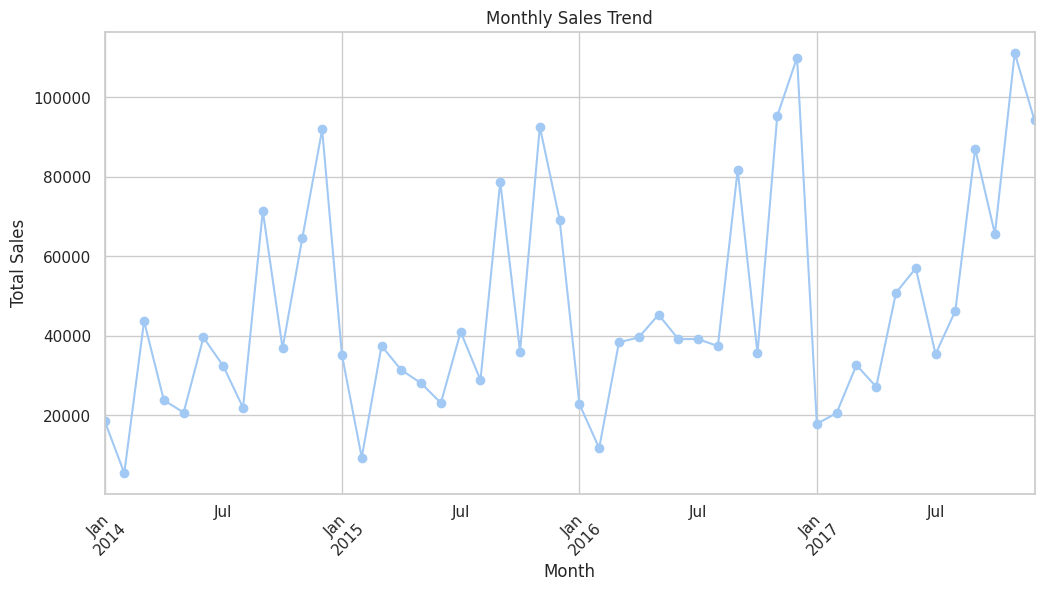

In [ ]:
if 'Order Date' in df.columns:
    # Convert to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    df.dropna(subset=['Order Date'], inplace=True)

    # Group by month
    df['Month'] = df['Order Date'].dt.to_period('M')
    monthly_sales = df.groupby('Month')['Sales'].sum()

    plt.figure(figsize=(12,6))
    monthly_sales.plot(marker='o')
    plt.title('Monthly Sales Trend')
    plt.ylabel('Total Sales')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Column 'Order Date' not found.")


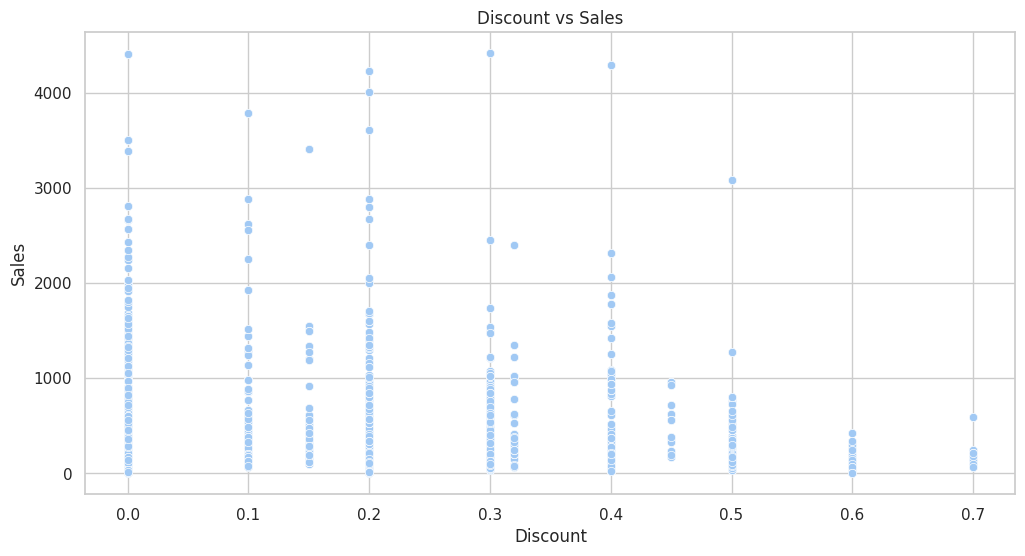

In [ ]:
# Sales vs Discount scatter
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title("Discount vs Sales")
plt.show()

## Correlation heatmap



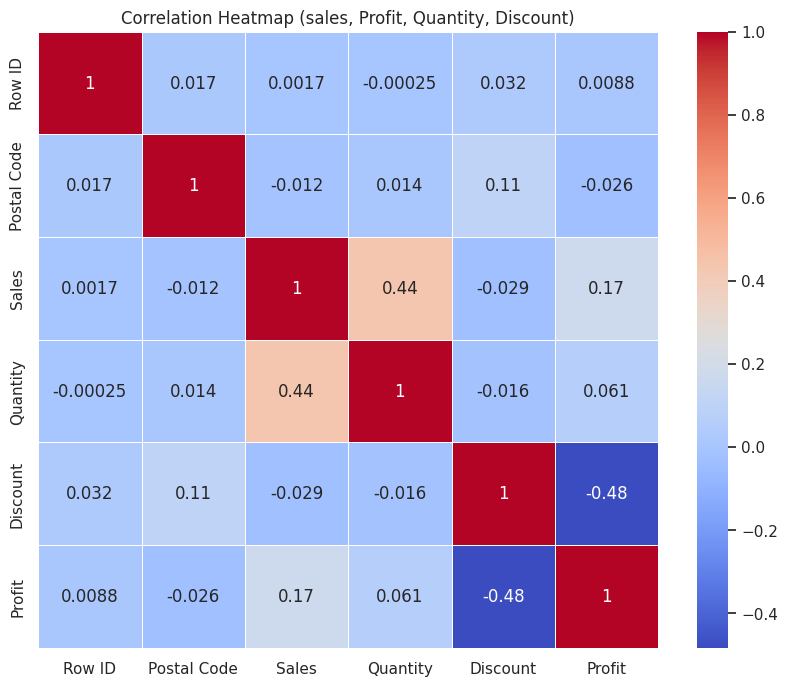

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

if not numeric_df.empty:
    corr = numeric_df.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap (sales, Profit, Quantity, Discount)')
    plt.show()
else:
    print("⚠️ No numeric columns found for correlation.")


In [ ]:
print("📌 KPI Summary:")
print(f"Total Sales: ₹{df['Sales'].sum():,.2f}")
print(f"Average Sales per Order: ₹{df['Sales'].mean():,.2f}")
print(f"Total Orders: {df.shape[0]}")
print(f"Unique Categories: {df['Category'].nunique()}")


📌 KPI Summary:
Total Sales: ₹2,225,999.39
Average Sales per Order: ₹349.83
Total Orders: 6363
Unique Categories: 3
